In [1]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import heapq

In [2]:
MINISt_data = pd.read_csv('trainImage.txt',header=None)
Data_array = MINISt_data.values

In [3]:
type(Data_array)

numpy.ndarray

In [4]:
Data_array_new = Data_array - mean(Data_array, axis=0)

In [5]:
C = dot(Data_array_new.T, Data_array_new) / (Data_array_new.shape[0] - 1)

In [6]:
eig_vals, eig_vecs = linalg.eig(C)

In [7]:
eig_vecs.shape

(784, 784)

In [8]:
Data_array_new.shape

(60000, 784)

In [9]:
eig_vals.shape

(784,)

In [10]:
eig_vals

array([ 3.32724667e+05,  2.43283939e+05,  2.11507367e+05,  1.84776386e+05,
        1.66926831e+05,  1.47844962e+05,  1.12178203e+05,  9.88744296e+04,
        9.46962491e+04,  8.08098245e+04,  7.23136203e+04,  6.93583013e+04,
        5.88268711e+04,  5.80140840e+04,  5.41237569e+04,  5.08430685e+04,
        4.54126063e+04,  4.37784591e+04,  4.07053405e+04,  3.95197904e+04,
        3.65535359e+04,  3.45151939e+04,  3.26932861e+04,  3.12865858e+04,
        3.02875526e+04,  2.87760784e+04,  2.78592854e+04,  2.69605814e+04,
        2.55331936e+04,  2.36861230e+04,  2.25627619e+04,  2.22217664e+04,
        2.06606718e+04,  2.01109854e+04,  1.95432009e+04,  1.86382921e+04,
        1.73409003e+04,  1.67262448e+04,  1.65058174e+04,  1.61916632e+04,
        1.56595799e+04,  1.52512141e+04,  1.43483288e+04,  1.36528231e+04,
        1.31988643e+04,  1.28604293e+04,  1.24114828e+04,  1.20543160e+04,
        1.16589043e+04,  1.10354744e+04,  1.09375078e+04,  1.07245254e+04,
        1.01477734e+04,  

In [11]:
Top20 = heapq.nlargest(20, range(len(eig_vals)), eig_vals.__getitem__)

In [12]:
e2k = eig_vecs[:,Top20]
e2k.shape

(784, 20)

In [13]:
X_pca = dot(Data_array_new, e2k)
X_pca

array([[ -123.93258866,  -312.67426202,   -24.51405176, ...,
         -309.15388607,  -277.59386988,   166.33237119],
       [-1011.71837587,  -294.85703827,   596.33956104, ...,
          -39.67733778,   -52.17324342,  -102.03482079],
       [   51.84960805,   392.17315286,  -188.50974943, ...,
          122.25335194,     9.24766142,  -434.41611557],
       ...,
       [  178.0534496 ,   160.07821109,  -257.61308227, ...,
           37.40074343,  -103.25358874,   238.39087509],
       [ -130.60607208,    -5.59193642,   513.85867395, ...,
          141.81798303,    77.67469387,   196.83268134],
       [  173.43595244,   -24.71880226,   556.01889393, ...,
         -270.85120805,   -96.60633712,  -208.26991426]])

In [14]:
X_pca.shape

(60000, 20)

In [15]:
import matplotlib.pyplot as plt

reduce_dim = 20
num_viz_pca = 10

Top10 = Top20[0:10]
Te2k = eig_vecs[:,Top10].T
Te2k.shape

(10, 784)

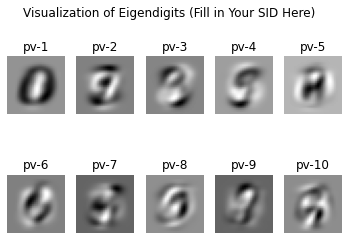

In [16]:
# load principle vectors from your local machine, e.g., here we suppose that the PCA vectors of the training
# set is stored in a file named 'pca_components_20' in the ./mnist/ directory
# pv_dir = 'mnist/pca_components_' + str(reduce_dim)
# pvs = np.empty((reduce_dim, 784))
# with open(pv_dir, 'r') as f:
#     # Some pre-processing steps, depending on how you store your principle vectors
#     # Here, we suppose that each row is corresponding to a principle vectors with string
#     # type, e.g, a row can be: '0.5, 0.2, 0.3, ..., 0.21', each element is separated by ','.
#     for k, line in enumerate(f.readlines()):
#         line = line.strip().split(',')
#         # the k-th principle vectors
#         pv_k = np.array(list(map(float, line)))
#         pvs [k] = pv_k
# visualize the principle vectors
fig, ax = plt.subplots(num_viz_pca // 5, 5)
# YOU NEED TO FILL IN YOUR SID IN THE FOLLOWING LINE
fig.suptitle('Visualization of Eigendigits ({})'.format('Fill in Your SID Here'))
ax = ax.reshape(-1)
for k, pv in enumerate(Te2k [:num_viz_pca]):
    pv = pv.reshape(28, 28)
    ax[k].imshow(pv, cmap='gray')
    ax[k].set_title('pv-{}'.format(k + 1))
    ax[k].axis('off')

fig.savefig('./viz_pca_vectors_{}.png'.format(num_viz_pca))

In [17]:
savetxt('pca.txt',X_pca,fmt='%f',delimiter=',')

In [18]:
savetxt('vector.txt',Te2k,fmt='%f',delimiter=',')